In [25]:
import matplotlib
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy.linalg import inv

In [3]:
def shift_mask(mask):
    M = mask.shape[0]
    N = mask.shape[1]
    new_mask = np.zeros(shape=(mask.shape[0],mask.shape[1]))
    if(M!=N or M%2 == 0):
        print("Invalid Mask supplied")
        return mask
    else:
        center = int(M/2)
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                new_mask[i,j] = mask[2*center - i , 2*center - j]
        return new_mask

In [4]:
def my1dfft(signal,inv=False):
    flag = -1
    if(inv):
        flag = 1
    M = signal.shape[0]
    F = np.zeros(M,dtype=np.complexfloating)
    for i in range(1,(M+1)):
        for k in range(1,M+1):
            F[i-1] += signal[k-1] * (np.exp(flag * 2j*np.pi*(i-1)*(k-1)/M))
    if(inv):
        return (F)
    else:
        return (F)

In [5]:
def my2dfft(img,inv=False):
    M = img.shape[0]
    N = img.shape[1]
    F = np.zeros(shape=(M,N),dtype=np.complex)
    temp_fft = np.zeros(shape=(M,N),dtype=np.complex)
    for u in range(1,M+1):
        temp_fft[u-1] = my1dfft(img[u-1,:],inv)
    for v in range(1,N+1):
        F[:,v-1] = (my1dfft(temp_fft[:,v-1],inv))
    if(inv):
        return ((F/(M*N)))
    else:
        return F

In [21]:
def my2dfftconv(img,mask):
    #I = my2dfft(img)
    #M = my2dfft(mask)
    img1 = img
    img = img.astype(float)
    mask = mask.astype(float)
    M1 = img.shape[0]
    N1 = img.shape[1]
   # for i in range(M1):
   #     for j in range(N1):
   #         img[i,j] = np.power(-1,i+j) * img[i,j]
    I = np.fft.fft2(img)
    J = np.real(I)
    for i in range(M1):
        for j in range(N1):
            J[i,j] = 20 * np.log(abs(J[i,j]))
    plt.imshow((J).astype(int))
    plt.show()
    mask = np.pad(mask,((0,M1 - mask.shape[0]) , (0 , N1 - mask.shape[1])),'constant',constant_values=(0, 0))
    print(mask.shape)
    #for i in range(mask.shape[0]):
    #    for j in range(mask.shape[1]):
    #        mask[i,j] = np.power(-1,i+j) * mask[i,j]
    M = np.fft.fft2(mask)
    Mult_mat = np.zeros(shape=(M1,N1),dtype=np.complex)
    #for i in range(M1):
    #    for j in range(N1):
    #        Mult_mat[i,j] = (I[i,j]) * (M[i,j])
    Mult_mat = (I) * (M) 
    inv_img = np.real(np.fft.ifft2((Mult_mat)))
    #inv_img = np.fft.ifftshift(inv_img)
    #inv_img = np.real(np.fft.ifft2(inv_img))
    #print(inv_img)
    #for i in range(M1):
    #    for j in range(N1):
    #        inv_img[i,j] = abs(np.power(-1,i+j) * inv_img[i,j])
    #print(inv_img)
    return inv_img.astype(int)

Original Image


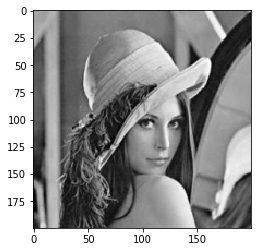

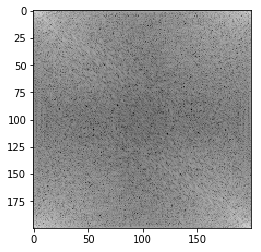

(200, 200)
(1+0j)


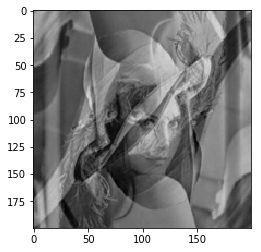

'\nI = np.fft.fft2(img)\nimg1 = np.real(np.fft.ifft2(I))\nplt.imshow(img1.astype(int))\nplt.show()\n'

In [22]:
img = misc.imread('lena.jpg',mode="L")
print("Original Image")
plt.imshow(img)
plt.gray()
plt.show()
X = np.array([[1 , -1 , -1],[1 , -1 , 0] , [1 , -1 , 1] , [1 , 0 , -1] , [1 , 0 , 0] , [1 , 0 , 1] , [1 , 1 , -1] , [1 , 1 , 0] , [1 , 1 , 1]])
beta_m = np.dot(inv(np.dot(X.T,X)) , X.T)
#beta_m is the solution to the problem Q2(a) which gives beta(min) matrix
#Now calculating three masks by taking row major order and shifting with reference of origin
mask1 = shift_mask(beta_m[0].reshape(3 , 3))
mask2 = shift_mask(beta_m[1].reshape(3 , 3))
mask3 = shift_mask(beta_m[2].reshape(3 , 3))
#plt.imshow(img1)
#mask = np.array([[0 , 1 , 0],[0 , 0 , 0] , [0 , 0 , 0]])
mask = np.array([[1]])
filter_img = my2dfftconv(img,mask)
plt.imshow(filter_img)
plt.show()
'''
I = np.fft.fft2(img)
img1 = np.real(np.fft.ifft2(I))
plt.imshow(img1.astype(int))
plt.show()
'''

In [23]:
def myconv2d_and(img,mask):
    M = mask.shape[0]
    N = mask.shape[1]
    offset_row = int(M/2)
    offset_col = int(N/2)
    new_img = np.zeros(shape=(img.shape[0]+M,img.shape[1] + N),dtype=np.integer)
    new_img[M-1 : -1,N-1 : -1] = img
    new_conv_img = np.zeros(shape=(img.shape[0],img.shape[1] ),dtype=np.float)
    mask_mean = np.mean(mask)
    mask_norm = (np.sum(np.square(mask - mask_mean)))**0.5
    for i in range(new_conv_img.shape[0]):
        for j in range(new_conv_img.shape[1]):

            img_mean = np.mean(new_img[i:i+M , j:j+N])
            img_norm = (np.sum(np.square(new_img[i:i+M , j:j+N] - img_mean)))**0.5
            if(img_norm != 0):
                new_conv_img[i,j] = ((np.sum((mask - mask_mean) * (new_img[i:i+M , j:j+N] - img_mean)))/(mask_norm*img_norm))
            else:
                new_conv_img[i,j] = 0
                
    return (new_conv_img)

In [26]:
img1 = misc.imread('lab4text.png',mode="L")
img2 = misc.imread('and.png',mode="L")
result = myconv2d_and(img1,img2)
max1 = np.max(result)
ma_i = []
for i in range(img2.shape[0],result.shape[0]-1):
    for j in range(img2.shape[1],result.shape[1]-1):
        if(result[i,j] == max1):
            ma_i.append((i,j))
print(len(ma_i))
#fig1 = plt.figure(figsize=(20,20))
im = Image.open('lab4text.png')
draw = ImageDraw.Draw(im)
for i in range(int(len(ma_i))):
    #rect = (patches.Rectangle((ma_i[i][0],ma_i[i][1]+img2.shape[1]),img2.shape[1],img2.shape[0],linewidth=1,edgecolor='r',facecolor='none'))
    draw.rectangle([ma_i[i][1]-img2.shape[1], ma_i[i][0]-img2.shape[0],ma_i[i][1] ,ma_i[i][0] ], outline=(200, 0, 100, 255))
im.show()

4


NameError: name 'Image' is not defined